In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = pd.read_csv('unique_employees_weighted_vibe.csv')
df2 = pd.read_csv('processed_leave_data (4).csv')

In [ ]:
df1.shape

(315, 2)

In [ ]:
df2.shape

(311, 4)

In [ ]:
df1.head()

,Employee_ID,Weighted_vibe_Score
0,EMP0002,1.0000
1,EMP0003,2.9996
2,EMP0004,4.0000
3,EMP0005,3.0000
4,EMP0006,5.0000


In [ ]:
df2.head()

,Employee_ID,Leave_Type,Leave_Days,Leave_End_Date
0,EMP0001,2.0,6,2024-05-01
1,EMP0002,1.5,18,2024-03-27
2,EMP0005,2.0,4,2023-03-24
3,EMP0007,2.5,25,2023-06-29
4,EMP0008,2.0,33,2024-05-15


In [ ]:
df_merged = pd.merge(df2, df1[['Employee_ID', 'Weighted_vibe_Score']], on='Employee_ID', how='right')
df_merged.head()

,Employee_ID,Leave_Type,Leave_Days,Leave_End_Date,Weighted_vibe_Score
0,EMP0002,1.5,18.0,2024-03-27,1.0000
1,EMP0003,NaN,NaN,NaN,2.9996
2,EMP0004,NaN,NaN,NaN,4.0000
3,EMP0005,2.0,4.0,2023-03-24,3.0000
4,EMP0006,NaN,NaN,NaN,5.0000


In [ ]:
unique_employee_ids = df_merged['Employee_ID'].nunique()
print(f"Number of unique Employee IDs: {unique_employee_ids}")

if unique_employee_ids == df_merged.shape[0]:
  print("All Employee IDs are unique.")
else:
  print("There are duplicate Employee IDs.")


Number of unique Employee IDs: 315
All Employee IDs are unique.


In [ ]:
df_merged.shape

(315, 5)

In [ ]:
df_merged.isna().sum()

,0
Employee_ID,0
Leave_Type,118
Leave_Days,118
Leave_End_Date,118
Weighted_vibe_Score,0


In [ ]:
df_merged.fillna(0, inplace = True)

In [ ]:
df_merged.isna().sum()

,0
Employee_ID,0
Leave_Type,0
Leave_Days,0
Leave_End_Date,0
Weighted_vibe_Score,0


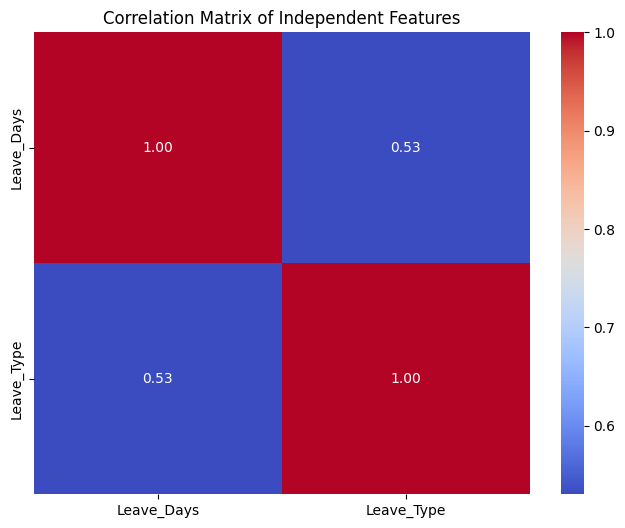

In [ ]:
independent_features = [ 'Leave_Days', 'Leave_Type']
correlation_matrix = df_merged[independent_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Features")
plt.show()

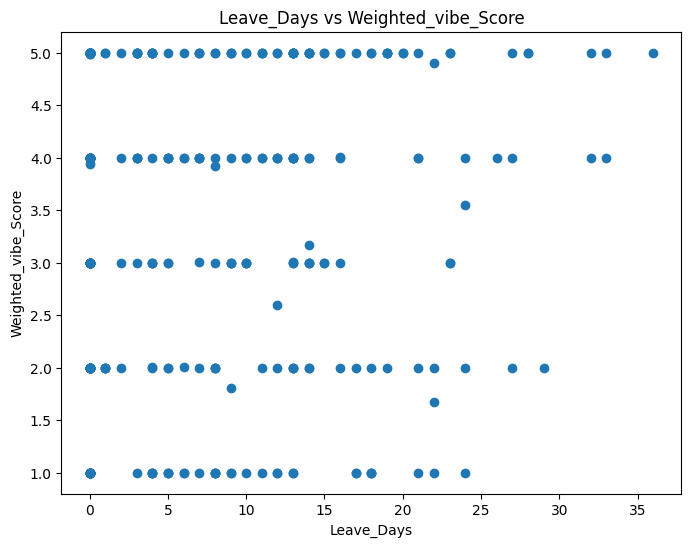

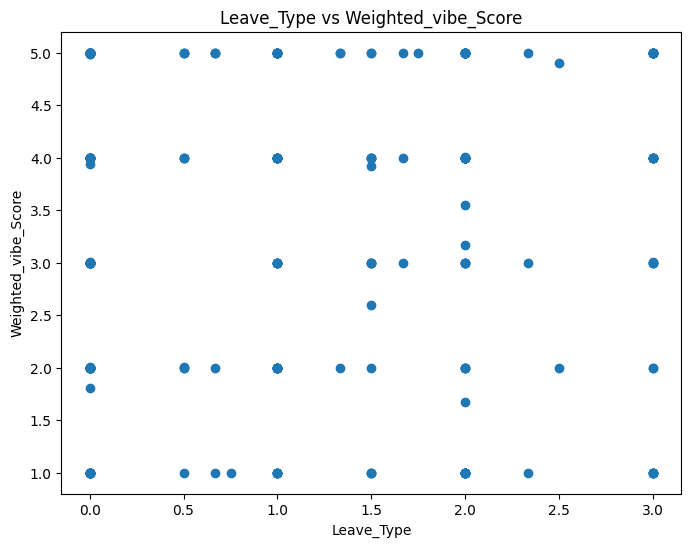

In [ ]:
for feature in independent_features:
  plt.figure(figsize=(8, 6))
  plt.scatter(df_merged[feature], df_merged['Weighted_vibe_Score'])
  plt.xlabel(feature)
  plt.ylabel('Weighted_vibe_Score')
  plt.title(f'{feature} vs Weighted_vibe_Score')
  plt.show()

In [ ]:
correlation_with_emotion = df_merged[independent_features + ['Weighted_vibe_Score']].corr()['Weighted_vibe_Score'][:-1]

print("Correlation between independent features and Weighted_vibe_Score:")
correlation_with_emotion

Correlation between independent features and Weighted_vibe_Score:


,Weighted_vibe_Score
Leave_Days,0.044442
Leave_Type,0.051558


In [ ]:
X = df_merged[independent_features].values
y = df_merged['Weighted_vibe_Score'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
input_layer = Input(shape=(X_scaled.shape[1],))

encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded_feature = Dense(1, activation='linear', name='combined_feature')(encoded)

output_layer = Dense(1, activation='linear', name='vibe_score_prediction')(encoded_feature)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse')

model.fit(X_scaled, y, epochs=500, batch_size=4, verbose=1, shuffle=True)

Epoch 1/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.3639
Epoch 2/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7649
Epoch 3/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3002
Epoch 4/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2609
Epoch 5/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2454
Epoch 6/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2143
Epoch 7/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1254
Epoch 8/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2407
Epoch 9/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2927
Epoch 10/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5210
Epoch 11/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1977
Epoch 12/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1447
Epoch 13/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2045
Epoch 14/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0166
Epoch 15/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1522
Epo

In [ ]:
encoder = Model(inputs=input_layer, outputs=encoded_feature)
df_merged['combined_feature_performance'] = encoder.predict(X_scaled)

df_merged[['Employee_ID', 'combined_feature_performance', 'Weighted_vibe_Score']]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Employee_ID,combined_feature_performance,Weighted_vibe_Score
0,EMP0002,-7.225537,1.0000
1,EMP0003,-8.381273,2.9996
2,EMP0004,-8.381273,4.0000
3,EMP0005,-8.394290,3.0000
4,EMP0006,-8.381273,5.0000
...,...,...,...
310,EMP0491,-10.375882,5.0000
311,EMP0493,-5.437553,2.0074
312,EMP0497,-8.381274,2.0000
313,EMP0498,-7.501320,5.0000


In [ ]:
df_merged[['combined_feature_performance', 'Weighted_vibe_Score']].corr()

,combined_feature_performance,Weighted_vibe_Score
combined_feature_performance,1.00000,-0.30938
Weighted_vibe_Score,-0.30938,1.00000


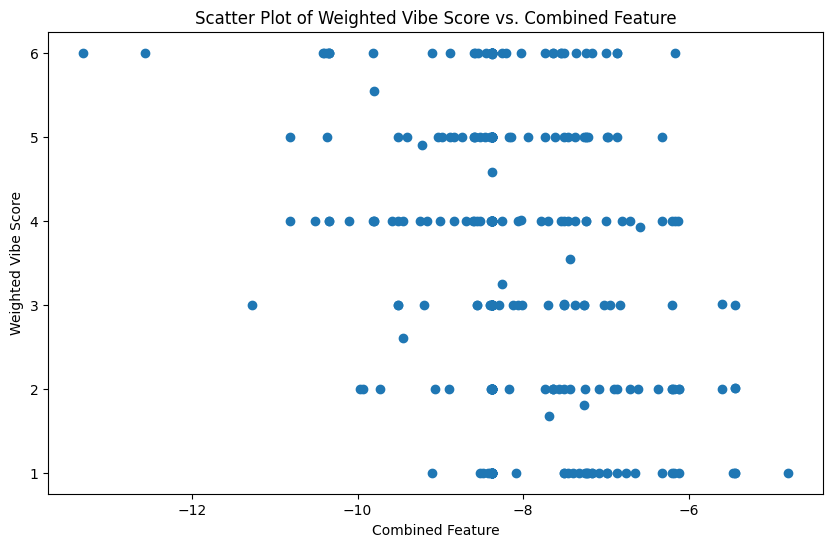

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['combined_feature_performance'], df_merged['Weighted_vibe_Score'])
plt.xlabel('Combined Feature')
plt.ylabel('Weighted Vibe Score')
plt.title('Scatter Plot of Weighted Vibe Score vs. Combined Feature')
plt.show()

In [ ]:
quantile_20 = df_merged['combined_feature_performance'].quantile(0.2)
quantile_80 = df_merged['combined_feature_performance'].quantile(0.8)
range_80_20 = quantile_80 - quantile_20

df_merged['should_chat_performance'] = np.where(
    df_merged['combined_feature_performance'] < quantile_20,
    ((quantile_20 - df_merged['combined_feature_performance']) / range_80_20) * 100,
    np.where(
        df_merged['combined_feature_performance'] > quantile_80,
        ((quantile_80 - df_merged['combined_feature_performance']) / range_80_20) * 100,
        0
    )
)

In [ ]:
df_merged.head()

,Employee_ID,Leave_Type,Leave_Days,Leave_End_Date,Weighted_vibe_Score,Leave_End_Date_Num,combined_feature_performance,should_chat_performance
0,EMP0002,1.5,18.0,2024-03-27 00:00:00,1.0000,450.0,-7.225537,-2.02479
1,EMP0003,0.0,0.0,0,2.9996,0.0,-8.381273,0.00000
2,EMP0004,0.0,0.0,0,4.0000,0.0,-8.381273,0.00000
3,EMP0005,2.0,4.0,2023-03-24 00:00:00,3.0000,81.0,-8.394290,0.00000
4,EMP0006,0.0,0.0,0,5.0000,0.0,-8.381273,0.00000


In [ ]:
df_merged.to_csv('combined_feature_leave.csv', index = False)